In [2]:
import numpy as np

import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"data\loandata.csv")


**Problem Statement**

- About Company

  - Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

- Problem

  - Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


## Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria.

- **Applying** a function to each group independently.

- **Combining** the results into a data structure.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to do one of the following:

**Aggregation** : compute a **summary statistic (or statistics)** for each group. Some examples:

- Compute group sums or means.

- Compute group sizes / counts.

**Transformation** : perform some group-specific computations and return a like-indexed object. Some examples:

- Standardize data (zscore) within a group.

- Filling NAs within groups with a value derived from each group.

**Filtration** : discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

- Discard data that belongs to groups with only a few members.

- Filter out data based on the group sum or mean.

Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories.





Syntax : 



df.groupby(by = grouping_columns)[columns_to_show].function()

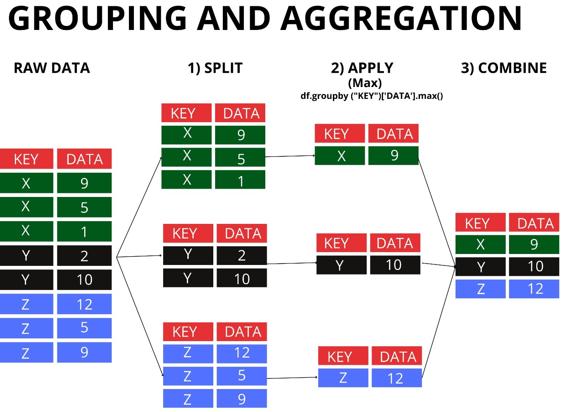

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [12]:
#Finding mean values based on gender
 
df.groupby(by = 'Gender').mean()   


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [13]:
#Finding mean value of ApplicantIncome based on gender 

df.groupby(by = "Gender")["ApplicantIncome"].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

In [14]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df.groupby(by = "Education")["ApplicantIncome"].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

In [17]:
df.groupby(by = "Gender")["ApplicantIncome","LoanAmount"].mean()

,ApplicantIncome,LoanAmount
Gender,,
Female,4643.473214,126.697248
Male,5446.460123,149.265957


In [18]:
##Finding mean values of specified columns based on gender 

df.groupby(by = "Gender")[["ApplicantIncome","LoanAmount"]].mean()

,ApplicantIncome,LoanAmount
Gender,,
Female,4643.473214,126.697248
Male,5446.460123,149.265957


In [19]:
df.groupby(by = "Gender")[["ApplicantIncome","LoanAmount",'Credit_History']].mean()

,ApplicantIncome,LoanAmount,Credit_History
Gender,,,
Female,4643.473214,126.697248,0.831683
Male,5446.460123,149.265957,0.847007


In [20]:
type(df.groupby(by = "Gender")[["ApplicantIncome","LoanAmount",'Credit_History']].mean())

pandas.core.frame.DataFrame

### Using multiple columns for groupby

In [21]:
df.groupby(by = ["Married","Gender"])["ApplicantIncome"].mean()

Married  Gender
No       Female    4503.787500
         Male      5236.146154
Yes      Female    4829.645161
         Male      5529.540616
Name: ApplicantIncome, dtype: float64

In [22]:
type(df.groupby(by = ["Married","Gender"])["ApplicantIncome"].mean())

pandas.core.series.Series

In [23]:
df.groupby(by = ["Gender", 'Married'])["ApplicantIncome"].mean()

Gender  Married
Female  No         4503.787500
        Yes        4829.645161
Male    No         5236.146154
        Yes        5529.540616
Name: ApplicantIncome, dtype: float64

In [24]:
df.groupby(by=['Gender','Married']).mean()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender Married                                                   
Female No           4503.787500        1020.012500  116.115385   
       Yes          4829.645161        1370.838710  153.322581   
Male   No           5236.146154        1529.430769  136.088000   
       Yes          5529.540616        1828.330308  154.011662   

                Loan_Amount_Term  Credit_History  
Gender Married                                    
Female No             355.012987        0.821918  
       Yes            349.161290        0.851852  
Male   No             348.562500        0.845528  
       Yes            335.931034        0.846626

In [25]:
df.groupby(by=['Gender','Married'])['ApplicantIncome'].max()    #max values in grouping gender and married

Gender  Married
Female  No         18165
        Yes        19484
Male    No         37719
        Yes        81000
Name: ApplicantIncome, dtype: int64

In [26]:
df['Gender'].isnull().sum()

13

### Aggregation Function on Groupby

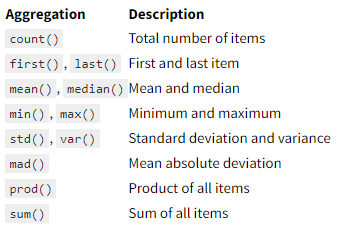

In [27]:
df.groupby(['Gender','Married'])["Gender"].agg(['count'])     #gives no of counts yes|no

count
Gender Married       
Female No          80
       Yes         31
Male   No         130
       Yes        357

In [28]:
df.groupby(['Gender'])['LoanAmount'].agg([np.mean, np.std, np.min, 
                                            np.max])                       #specified statistical values mean,min,max,std

,mean,std,amin,amax
Gender,,,,
Female,126.697248,79.286460,9.0,600.0
Male,149.265957,82.810851,17.0,650.0


**Note that df.groupby returns a DataFrameGroupBy object.**

In [29]:
df1=df.groupby(['Married',"Gender"])
df1

In [30]:
type(df1)

pandas.core.groupby.generic.DataFrameGroupBy

In [31]:
df1["ApplicantIncome"].mean().sort_values()

Married  Gender
No       Female    4503.787500
Yes      Female    4829.645161
No       Male      5236.146154
Yes      Male      5529.540616
Name: ApplicantIncome, dtype: float64

In [32]:
df1["ApplicantIncome"].mean()

Married  Gender
No       Female    4503.787500
         Male      5236.146154
Yes      Female    4829.645161
         Male      5529.540616
Name: ApplicantIncome, dtype: float64

## Crosstab
The pandas crosstab function builds a cross-tabulation table that **can show the frequency with which certain groups of data appear.**

Summary tables:

- Suppose we want to see how the observations in our sample are distributed in the context of two variables To do so, we can build a contingency table using the crosstab method:




pd.crosstab(column1, column2)

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [34]:
pd.crosstab(df["Gender"],df["Married"])

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


### Question:  I want to compare Average Income  with respect to Gender and Married

**Using crosstab**

In [35]:
## USing Cross Tab


pd.crosstab(df.Gender, df.Married, values=df.ApplicantIncome, aggfunc='mean')

Married,No,Yes
Gender,,
Female,4503.787500,4829.645161
Male,5236.146154,5529.540616


**Using Groupby**

In [36]:
# Using Groupby:

df.groupby(by = ["Married","Gender"])["ApplicantIncome"].mean()

Married  Gender
No       Female    4503.787500
         Male      5236.146154
Yes      Female    4829.645161
         Male      5529.540616
Name: ApplicantIncome, dtype: float64

# Pivot Table

A pivot table is a data summarization tool that is used in the context of data processing. 

Pivot tables are used to **summarize, sort, reorganize, group, count, total or average data stored in a database**. 

It allows its users to transform columns into rows and rows into columns. 

It allows grouping by any data field. 

Pivot tables are the **perfect solution when you need to summarize and analyze large amounts of data.** 



We will create a pivot table on **ApplicantIncome** and compare how marks in multiple subject are correlated to the salary.


In [4]:
df=pd.read_csv(r"data\loandata.csv")

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [49]:
#Pivot table on ApplicantIncome mean value based on gender

df.pivot_table(values="ApplicantIncome",index="Gender",aggfunc='mean')       

,ApplicantIncome
Gender,
Female,4643.473214
Male,5446.460123


In [47]:
#Pivot table on ApplicantIncome mean value based on gender and married column

df.pivot_table(values="ApplicantIncome",index="Gender",columns = "Married",aggfunc='mean')

Married,No,Yes
Gender,,
Female,4503.787500,4829.645161
Male,5236.146154,5529.540616


In [51]:
#Pivot table on ApplicantIncome count value based on gender and married column

df.pivot_table(values="ApplicantIncome",index="Gender",columns = "Married",aggfunc='count')

Married,No,Yes
Gender,,
Female,80,31
Male,130,357
